# Lab 1

In [244]:
import pandas as pd
import numpy as np

In [254]:
# importing dataset
dataset = pd.read_csv("auto-mpg.csv")
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Description of the variables

 - **mpg** - fuel consumption
 - **cylinders** - number of cylidners
 - **displacements**
 - **acceleration**
 - **origin**
 - **car name**

In [255]:
# removal of unnecesary column
dataset = dataset.drop('car name', axis=1)
dataset = dataset.drop('model year', axis=1) # as for now ;)

In [256]:
# checking for missing data
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
origin          0
dtype: int64

In [257]:
# checking for non NA missing values
dataset_numeric = dataset.apply(lambda x: pd.to_numeric(x, errors='coerce'))
dataset_numeric.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
origin          0
dtype: int64

In [258]:
# dropping rows where horsepower doesn't have proper value
dataset_numeric = dataset_numeric.dropna()
dataset_numeric.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
origin          0
dtype: int64

In [259]:
# Setting proper types for the variables


In [260]:
import matplotlib.pyplot as plt
import seaborn as sn

corr_matrix = dataset_numeric.drop(dataset_numeric.columns[[1,6,7]],axis=1).corr(method="spearman") # only continous variables
# pearson - detecting only linearity correlations
# spearman - detecting non-linearity correlations
sn.heatmap(corr_matrix, annot=True)

IndexError: index 7 is out of bounds for axis 0 with size 7

In [261]:
# Dropping Redundant Variables

# finding predictors with the correlation above 0.9

corr_matrix[(corr_matrix>=0.9) & (corr_matrix<1)].dropna(how="all").dropna(how="all", axis=1)

# removing the weight variable, as it is less correlated with the dependent variable

dataset_numeric = dataset_numeric.drop('weight', axis=1)


## Visualizations

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,6))
sn.boxplot(dataset_numeric, y='mpg', x='model year', palette='deep')
plt.title("fuel consumption - different car models")
plt.show()

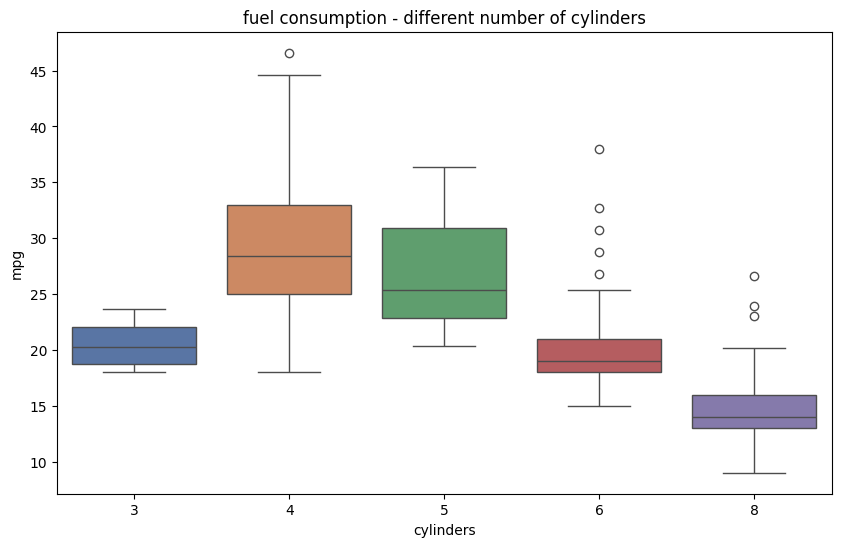

In [263]:
plt.figure(figsize=(10,6))
sn.boxplot(dataset_numeric, y='mpg', x='cylinders', palette='deep')
plt.title("fuel consumption - different number of cylinders")
plt.show()

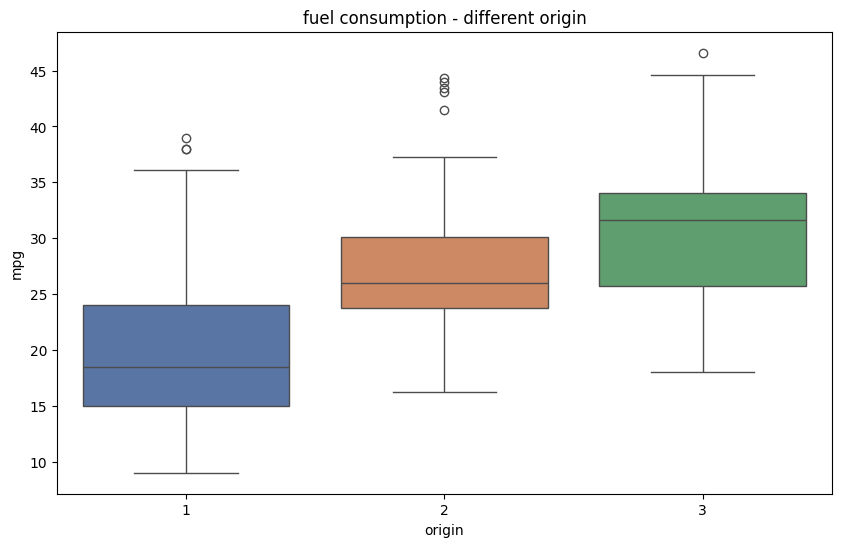

In [264]:
plt.figure(figsize=(10,6))
sn.boxplot(dataset_numeric, y='mpg', x='origin', palette='deep')
plt.title("fuel consumption - different origin")
plt.show()

In [265]:
import random
from sklearn.model_selection import train_test_split

# Spliting dataset into train and test part
random.seed(2024)

train, test = train_test_split(dataset_numeric, test_size=0.2)
y_train, x_train = train.iloc[:, 0], train.iloc[:, 1:]
y_test, x_test = test.iloc[:, 0], test.iloc[:, 1:]

In [266]:
from sklearn.linear_model import LinearRegression

# building prediction model

reg_model = LinearRegression()
reg_model = reg_model.fit(x_train, y_train)

In [267]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# making predictions

prediction = reg_model.predict(x_test)

# evaluation of the first model (MSE, MAE, R^2)

# mean_squared_error(y_test, prediction)
MSE = np.mean(np.square((prediction - y_test)))

# mean_absolute_error(y_test, prediction)
MAE = np.mean(abs(prediction - y_test))

# r2_score(y_test, prediction)
SST_model = sum(np.square(y_test - np.mean(y_test)))
SSR_model = sum(np.square(prediction - y_test))
R_squared_model = 1 - (SSR_model / SST_model)

print(' MSE: ', round(MSE, 4), "\n",
       "MAE: ", round(MAE, 4), "\n",
       "R^2: ", round(R_squared_model, 4))

 MSE:  20.2043 
 MAE:  3.3584 
 R^2:  0.6229


In [ ]:
# second approach with one hot encoding



In [424]:
x_test_dummies

,displacement,horsepower,acceleration,cylinders_4,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
95,455.0,225.0,11.0,0,0,1,1,0,0
190,351.0,152.0,12.8,0,0,1,1,0,0
45,258.0,110.0,13.5,0,1,0,1,0,0
350,105.0,63.0,14.9,1,0,0,1,0,0
200,250.0,78.0,21.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
226,231.0,105.0,16.9,0,1,0,1,0,0
48,250.0,88.0,14.5,0,1,0,1,0,0
216,98.0,68.0,18.5,1,0,0,0,0,1
149,120.0,97.0,15.0,1,0,0,0,0,1
